In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [3]:
import warnings 
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('Vegetable and Fruits Prices in India.csv')

In [6]:
df.head()

,index,Datesk,Item_Name,Date,Price
0,0,20110101,Kashini greens,1/1/2011,NaN
1,1,20110101,Pineapple juice,1/1/2011,NaN
2,2,20110101,Thiland Juice,1/1/2011,NaN
3,3,20110101,Thiland Jelly,1/1/2011,NaN
4,4,20110101,Orange juice,1/1/2011,NaN


In [ ]:
# Preprocessing

In [7]:
df.isnull().sum()

index             0
Datesk            0
Item_Name      7839
Date              0
Price        317017
dtype: int64

In [8]:
df.shape

(868965, 5)

In [12]:
# percentage null values
print((df.isnull().sum()['Price']/df.shape[0])*100,"% null values in price columns")

36.482136794922695 % null values in price columns


In [13]:
df1 = df.dropna()
df1.shape,df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 551948 entries, 296 to 868964
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   index      551948 non-null  int64  
 1   Datesk     551948 non-null  int64  
 2   Item_Name  551948 non-null  object 
 3   Date       551948 non-null  object 
 4   Price      551948 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 25.3+ MB


((551948, 5), None)

In [14]:
df2 = pd.DataFrame(df1)
df2.head()

,index,Datesk,Item_Name,Date,Price
296,296,20110101,Sponge Gourd,1/1/2011,32.0
22311,22311,20110309,Berry Southafrica,9/3/2011,0.0
22312,22312,20110309,Baby corn cleaned,9/3/2011,56.0
22313,22313,20110309,Baby corn,9/3/2011,14.0
22314,22314,20110309,Chillies Bajji yagani,9/3/2011,0.0


In [15]:
df2.duplicated().sum()

0

In [17]:
df2['Item_Name'].unique()

array(['Sponge Gourd', 'Berry Southafrica', 'Baby corn cleaned',
       'Baby corn', 'Chillies Bajji yagani', 'Chilakarive green',
       'Potato pack', 'Onion pack', 'Chakota greens', 'Eggs',
       'Arive greens', 'knol-khol', 'Chikadi kai', 'Garlic cleaned',
       'Garlic', 'Ginger New', 'Ginger', 'Ground nut Hybrid',
       'Ground nut Local', 'Double Beans', 'Double Beans seeds',
       'Drumstik', 'Cherry Tomoto', 'Cauliflower per Kg',
       'Cauliflower(S)', 'Cauliflower(M)', 'Mushroom Milky',
       'Mushroom Button', 'Lime Bijapur', 'Grapes Dry 100gm',
       'Grapes Dry 250gm', 'Grapes Red globe', 'Lime Local',
       'Little gourd', 'Ladys finger', 'Herali kai', 'Grapes T.S.',
       'Avarekai (Field Beans )', 'Banana cooking R.Banana', 'Jukani',
       'Sham gadde', 'Snake Gourd(S)', 'Snake Gourd', 'Raddish Red',
       'Raddish', 'Sweet Potato(Genasu)', 'Potato Baby', 'Potato(S)',
       'Potato(B)', 'Potato(M)', 'Pumpkin Japan', 'Pumpkin Red',
       'Pumpkin Ash', 'Pea

In [19]:
len(df2['Item_Name'].unique())

330

In [ ]:
# Feature Engineering

In [ ]:
spliting date columns into year,month,day

In [20]:
Date1 = []
Date2 = []
for i in range(len(df2['Date'])):
    if str(df2["Date"].iloc[i]).count("-") ==2:
        lis = str(df2["Date"].iloc[i]).split("-")
        date = lis[2][:2]
        lis[2] = date
        lis = list(map(int,lis))
        lis = list([lis[1],lis[2],lis[0]])
        Date1.append(lis)
    else:
        lis = str(df2["Date"].iloc[i]).split("/") 
        lis = list(map(int,lis))
        Date2.append(lis)

In [21]:
Date1[:10],len(Date1)

([[1, 20, 13],
  [1, 20, 13],
  [1, 20, 13],
  [1, 20, 13],
  [1, 20, 13],
  [1, 20, 13],
  [1, 20, 13],
  [1, 20, 13],
  [1, 20, 13],
  [1, 20, 13]],
 48692)

In [22]:
Date2[:10],len(Date2)

([[1, 1, 2011],
  [9, 3, 2011],
  [9, 3, 2011],
  [9, 3, 2011],
  [9, 3, 2011],
  [9, 3, 2011],
  [9, 3, 2011],
  [9, 3, 2011],
  [9, 3, 2011],
  [9, 3, 2011]],
 503256)

In [23]:
Date = Date1+Date2
Date[:10],len(Date)

([[1, 20, 13],
  [1, 20, 13],
  [1, 20, 13],
  [1, 20, 13],
  [1, 20, 13],
  [1, 20, 13],
  [1, 20, 13],
  [1, 20, 13],
  [1, 20, 13],
  [1, 20, 13]],
 551948)

In [24]:
Date_df = pd.DataFrame(Date)

In [25]:
df3 = np.c_[df2,Date_df]
df4 = pd.DataFrame(df3,columns=list(df2.columns)+[0,1,2])
df4.head()

,index,Datesk,Item_Name,Date,Price,0,1,2
0,296,20110101,Sponge Gourd,1/1/2011,32.0,1,20,13
1,22311,20110309,Berry Southafrica,9/3/2011,0.0,1,20,13
2,22312,20110309,Baby corn cleaned,9/3/2011,56.0,1,20,13
3,22313,20110309,Baby corn,9/3/2011,14.0,1,20,13
4,22314,20110309,Chillies Bajji yagani,9/3/2011,0.0,1,20,13


In [27]:
len(df4["Item_Name"].unique())

330

In [ ]:
# Label Encoding

In [28]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [30]:
df4["Item_Name"] = encoder.fit_transform(df4["Item_Name"])
df4.head()

,index,Datesk,Item_Name,Date,Price,0,1,2
0,296,20110101,294,1/1/2011,32.0,1,20,13
1,22311,20110309,45,9/3/2011,0.0,1,20,13
2,22312,20110309,21,9/3/2011,56.0,1,20,13
3,22313,20110309,20,9/3/2011,14.0,1,20,13
4,22314,20110309,88,9/3/2011,0.0,1,20,13


In [34]:
df5 = df4.drop(["Datesk","Item_Name","Date"],axis=1)

In [ ]:
# Filtering Target column

In [ ]:
Removing Zero values from datset

In [36]:
len(df5[df5['Price']==0])

156298

In [38]:
indx = df5[df5['Price']==0].index
df6 = df5.drop(indx)
print("count of zero price value",len(df6[df6['Price']==0]))

count of zero price value 0


In [39]:
df6.head()

,index,Price,0,1,2
0,296,32.0,1,20,13
2,22312,56.0,1,20,13
3,22313,14.0,1,20,13
5,22315,22.0,1,20,13
8,22318,21.0,1,20,13


In [ ]:
# Removing Duplicate Values from Data Frame

In [40]:
df6.duplicated().sum(),df6.shape

(0, (395650, 5))

In [41]:
df6.drop_duplicates(inplace=True)

In [42]:
df6.shape

(395650, 5)

In [ ]:
# Visualizing Data

In [43]:
import matplotlib.pyplot as plt

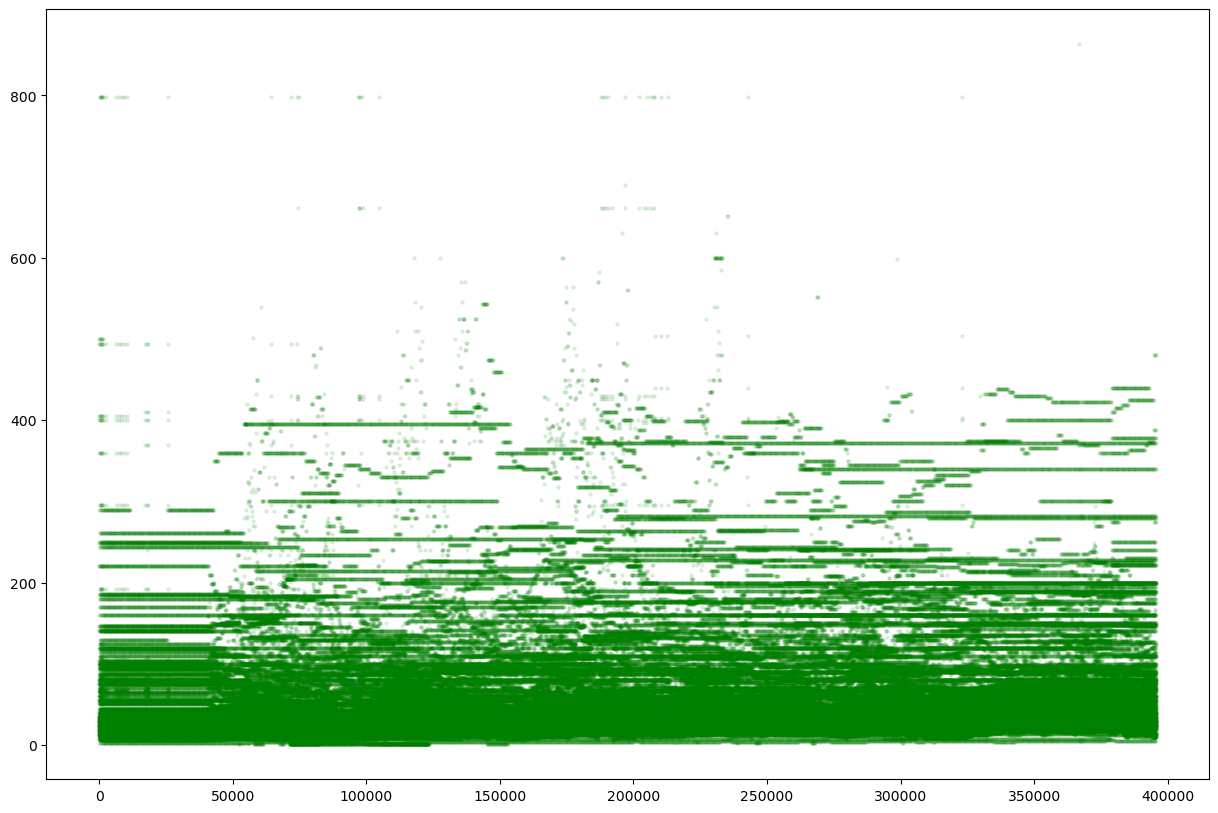

In [45]:
plt.figure(figsize=(15,10))
plt.scatter(range(len(df6["Price"])),df6["Price"],s=5,alpha=0.1,c='green')
plt.show()

In [ ]:
# Training of model

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LassoCV,RidgeCV
from sklearn.tree import DecisionTreeRegressor

In [48]:
X_train,X_test,y_train,y_test = train_test_split(df6.drop(["Price"],axis='columns'),df6["Price"],test_size=0.3)

In [ ]:
# Choosing best model for prediction

In [50]:
cross_val_score(RandomForestRegressor(n_estimators=10),df6.drop(["Price"],axis='columns'),df6["Price"])

array([-0.05439335, -0.12280596, -0.12518345, -0.17858563, -0.79200572])

In [51]:
cross_val_score(DecisionTreeRegressor(),df6.drop(["Price"],axis='columns'),df6["Price"])

array([-0.05911369, -0.32575687, -0.75249616, -0.24252089, -1.64906423])

In [ ]:
rf_model = RandomForestRegressor(n_estimators=50)
rf_model.fit(X_train,y_train)
rf_model.score(X_train,y_train),rf_model.score(X_test,y_test)

In [ ]:
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)
model_lr.score(X_train,y_train),model_lr.score(X_test,y_test)

In [ ]:
model_kn = KNeighborsRegressor()
model_kn.fit(X_train,y_train)
model_kn.score(X_train,y_train),model_kn.score(X_test,y_test)

In [ ]:
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train,y_train)
model_dt.score(X_train,y_train),model_dt.score(X_test,y_test)

In [ ]:
model_ls = LassoCV()
model_ls.fit(X_train,y_train)
model_ls.score(X_train,y_train),model_ls.score(X_test,y_test)

In [ ]:
model_rs = RidgeCV()
model_rs.fit(X_train,y_train)
model_rs.score(X_train,y_train),model_rs.score(X_test,y_test)

In [ ]:
# Predictions With Model

In [ ]:
y_pred = rf_model.predict(X_test)

In [60]:
print("predicted",y_pred[:10],"\n","true value",list(y_test[:10]))

predicted [ 67.28 178.44 108.98  20.26  36.7   49.14  47.66  35.64 189.96  36.  ] 
 true value [20.0, 55.0, 20.0, 25.0, 40.0, 37.0, 16.0, 10.0, 27.0, 116.0]


In [ ]:
# Training Model with best found Algorihtm

In [61]:
final_model = RandomForestRegressor(n_estimators=20)
final_model.fit(df6.drop("Price",axis='columns'),df6['Price'])

KeyError: "['price'] not found in axis"

In [ ]:
final_model.score(df6.drop("Price",axis='columns'),df6['Price'])

In [ ]:
Saving Model using joblib

In [ ]:
joblib.dump(final_model,"fruit price prediction")